In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, mixed_precision
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mixed_precision.set_global_policy('mixed_float16')

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

with tf.device('/CPU:0'):
    train_data = tf.keras.utils.image_dataset_from_directory(
        r"D:\my_python\my_tensorflow\project_exp\train",
        image_size=(224, 224),
        label_mode='categorical',
        batch_size=64,
    ).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    test_data = tf.keras.utils.image_dataset_from_directory(
        r"D:\my_python\my_tensorflow\project_exp\test",
        image_size=(224, 224),
        label_mode='categorical'
    ).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    
    val_data = tf.keras.utils.image_dataset_from_directory(
        r"D:\my_python\my_tensorflow\project_exp\val",
        image_size=(224, 224),
        label_mode='categorical'
    ).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)




    # Define the feature extraction layer
    feature_extract_layer = MobileNetV2(input_shape=(224, 224, 3),
                                        weights="imagenet",
                                        include_top=False)
    feature_extract_layer.trainable=False

    # Define the preprocessing model
    preprocessing_model = keras.Sequential([
        keras.Input(shape=(224, 224, 3)),
        feature_extract_layer,
        layers.MaxPooling2D(2),
        layers.Flatten()
    ])  

    


    def tf_to_numpy(data):
        images = []
        labels = []
        for image, label in data:
            images.extend(image.numpy())
            labels.extend(label.numpy())
        return np.array(images), np.array(labels)

    train_images, train_labels = tf_to_numpy(train_data)
    test_images, test_labels = tf_to_numpy(test_data)
    val_images, val_labels = tf_to_numpy(val_data)






with tf.device('/GPU:0'): 
    train_images_preprocessed = preprocessing_model.predict(train_images)
    test_images_preprocessed = preprocessing_model.predict(test_images)
    val_images_preprocessed = preprocessing_model.predict(val_images)

1 Physical GPUs, 1 Logical GPUs
Found 2722 files belonging to 4 classes.
Found 154 files belonging to 4 classes.
Found 151 files belonging to 4 classes.
5/5 [==============================] - 22s 5s/step


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
pca.fit(train_images_preprocessed)
train_pca = pca.transform(train_images_preprocessed)
test_pca=pca.transform(test_images_preprocessed)
val_pca=pca.transform(val_images_preprocessed)

In [ ]:
np.savetxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_images.txt",train_pca)
np.savetxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_images.txt",test_pca)
np.savetxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_labels.txt",train_labels)
np.savetxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_labels.txt",test_labels)
np.savetxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_images.txt",val_pca)
np.savetxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_labels.txt",val_labels)


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, mixed_precision, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
mixed_precision.set_global_policy('mixed_float16')
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [9]:
with tf.device('/CPU:0'): 
    train_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_images.txt").astype(np.float32)
    test_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_images.txt").astype(np.float32)
    train_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_labels.txt").astype(np.float32)
    test_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_labels.txt").astype(np.float32)
    val_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_images.txt").astype(np.float32)
    val_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_labels.txt").astype(np.float32)
    print('Shape of train_images:', train_images.shape)
    print('Shape of train_labels:', train_labels.shape)
    print('Shape of test_images:', test_images.shape)
    print('Shape of test_labels:', test_labels.shape)
    print('Shape of val_images:', val_images.shape)
    print('Shape of val_labels:', val_labels.shape)


Shape of train_images: (2722, 1032)
Shape of train_labels: (2722, 4)
Shape of test_images: (154, 1032)
Shape of test_labels: (154, 4)
Shape of val_images: (151, 1032)
Shape of val_labels: (151, 4)


In [3]:
import numpy as np
import sklearn
train_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_images.txt").astype(np.float32)
test_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_images.txt").astype(np.float32)
train_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_labels.txt").astype(np.float32)
test_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_labels.txt").astype(np.float32)
val_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_images.txt").astype(np.float32)
val_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_labels.txt").astype(np.float32)
print('Shape of train_images:', train_images.shape)
print('Shape of train_labels:', train_labels.shape)
print('Shape of test_images:', test_images.shape)
print('Shape of test_labels:', test_labels.shape)
print('Shape of val_images:', val_images.shape)
print('Shape of val_labels:', val_labels.shape)

Shape of train_images: (2722, 1032)
Shape of train_labels: (2722, 4)
Shape of test_images: (154, 1032)
Shape of test_labels: (154, 4)
Shape of val_images: (151, 1032)
Shape of val_labels: (151, 4)


In [121]:
with tf.device('/GPU:0'): 
    # Define the model
    base_model = keras.Sequential([
        keras.Input(shape=(1032,)),  # Adjust the input shape to match the output of the preprocessing base_model
        layers.BatchNormalization(),
        layers.Dense(4, activation="softmax", dtype='float32', kernel_regularizer=regularizers.l1(.01))
    ])
    base_model.load_weights(r'D:\my_python\my_tensorflow\project_exp\100%\initial_model_4.h5')

    base_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    checkpoint = ModelCheckpoint(r'D:\my_python\my_tensorflow\project_exp\100%\model_4.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
    his=base_model.fit(train_images, train_labels, batch_size=512, epochs=40, verbose=1, validation_data=(val_images, val_labels), callbacks=[checkpoint])
    model = keras.models.load_model(r'D:\my_python\my_tensorflow\project_exp\100%\model_4.h5')



    print('train accuracy:', model.evaluate(train_images, train_labels)[1])
    print('test accuracy:', model.evaluate(test_images, test_labels)[1])
    print('val accuracy:', model.evaluate(val_images, val_labels)[1])

Epoch 1/40
6/6 [==============================] - 1s 30ms/step - loss: 3.4703 - accuracy: 0.2535 - val_loss: 3.5912 - val_accuracy: 0.3245
Epoch 2/40
6/6 [==============================] - 0s 14ms/step - loss: 3.1656 - accuracy: 0.2880 - val_loss: 3.1052 - val_accuracy: 0.3709
Epoch 3/40
6/6 [==============================] - 0s 14ms/step - loss: 2.9171 - accuracy: 0.3218 - val_loss: 2.7690 - val_accuracy: 0.4106
Epoch 4/40
6/6 [==============================] - 0s 14ms/step - loss: 2.6902 - accuracy: 0.3556 - val_loss: 2.5065 - val_accuracy: 0.4305
Epoch 5/40
6/6 [==============================] - 0s 16ms/step - loss: 2.4850 - accuracy: 0.3964 - val_loss: 2.2897 - val_accuracy: 0.4503
Epoch 6/40
6/6 [==============================] - 0s 14ms/step - loss: 2.2985 - accuracy: 0.4335 - val_loss: 2.1092 - val_accuracy: 0.4901
Epoch 7/40
6/6 [==============================] - 0s 14ms/step - loss: 2.1290 - accuracy: 0.4868 - val_loss: 1.9529 - val_accuracy: 0.5298
Epoch 8/40
6/6 [===========

In [ ]:
# print the loss of individual misclassified images
# predictions = model.predict(train_images)
# for i in range(len(predictions)):
#     if np.argmax(predictions[i]) != np.argmax(train_labels[i]):
#         print('loss:', tf.keras.losses.categorical_crossentropy(train_labels[i], predictions[i]).numpy())
#         print('true label:', train_labels[i])
#         print('predicted label:', predictions[i])
#         print()
#         print()

5/5 [==============================] - 0s 2ms/step


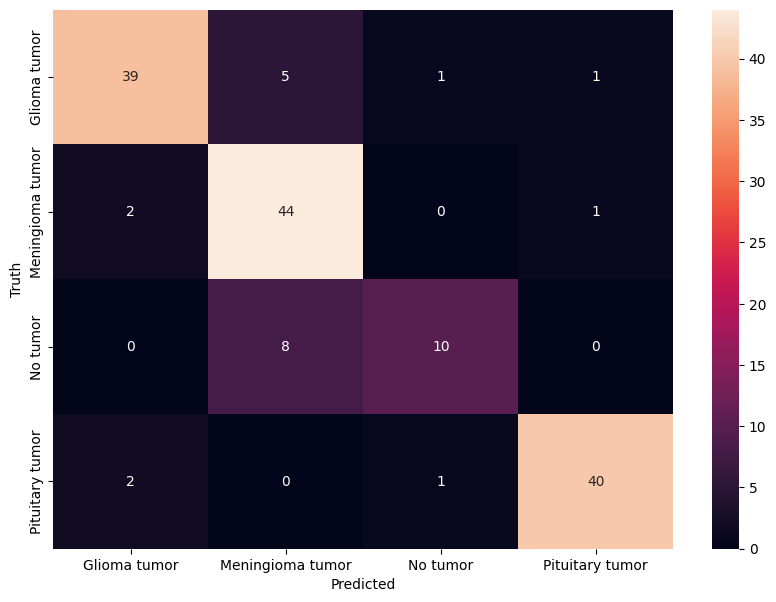

In [122]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


predictions = model.predict(test_images)
predictions = predictions.argmax(axis=1)
test_true = test_labels.argmax(axis=1)
# Now we generate the confusion matrix
cm = confusion_matrix(test_true, predictions)

# Assuming you have already calculated the confusion matrix 'cm'
labels = ["Glioma tumor", "Meningioma tumor", "No tumor", "Pituitary tumor"]

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# human integration 

In [124]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Define the model

initial_train_size = len(train_images)
human_images = []
human_labels = []

save_points = list(range(95, 73, -5))  # Save points at 100%, 95%, 90%, 85%, and so on

for i in range(initial_train_size):
    model = keras.Sequential([
    keras.Input(shape=(1032,)),  # Adjust the input shape to match the output of the preprocessing model
    layers.BatchNormalization(),
    layers.Dense(4, activation="softmax", dtype='float32', kernel_regularizer=regularizers.l1(0.01))
    ])
    model.load_weights(r'D:\my_python\my_tensorflow\project_exp\100%\initial_model_4.h5')

    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    # Train the model
    model.fit(train_images, train_labels, batch_size=512, epochs=40, verbose=0)
    print('train accuracy:', model.evaluate(train_images, train_labels,verbose=0)[1])

    # Calculate loss for each sample
    predictions = model.predict(train_images, verbose=0)
    losses = []
    for i in range(len(predictions)):
        loss = tf.keras.losses.categorical_crossentropy(train_labels[i], predictions[i]).numpy()
        losses.append(loss)

    # Get the index of the image with the highest loss
    max_loss_index = np.argmax(losses)

    # Move the image with the highest loss to human_images
    human_images.append(train_images[max_loss_index])
    human_labels.append(train_labels[max_loss_index])

    # Remove the image with the highest loss from training data
    train_images = np.delete(train_images, max_loss_index, axis=0)
    train_labels = np.delete(train_labels, max_loss_index, axis=0)

    # Check if we've reached a save point
    current_percentage = int(100 * len(train_images) / initial_train_size)
    if current_percentage in save_points:
        save_points.remove(current_percentage)  # Remove the save point so we don't save again at the same point

        # Create a new folder for each save point
        folder_name = f'{current_percentage}%_of_initial_training_size'
        os.makedirs(folder_name, exist_ok=True)

        # Save the model
        model_path = os.path.join(folder_name, 'model.h5')
        model.save(model_path)
        if len(save_points) == 0:
            break

        # Save the numpy arrays
        np.savetxt(os.path.join(folder_name, 'train_images.txt'), train_images)
        np.savetxt(os.path.join(folder_name, 'train_labels.txt'), train_labels)
        np.savetxt(os.path.join(folder_name, 'human_images.txt'), human_images)
        np.savetxt(os.path.join(folder_name, 'human_labels.txt'), human_labels)

        print(f'Model and data saved in folder: {folder_name}')

train accuracy: 0.9144011735916138
train accuracy: 0.9195148944854736
train accuracy: 0.9194852709770203
train accuracy: 0.915777862071991
train accuracy: 0.919793963432312
train accuracy: 0.9160839319229126
train accuracy: 0.9175257682800293
train accuracy: 0.9204419851303101
train accuracy: 0.9182019233703613
train accuracy: 0.918540358543396
train accuracy: 0.9192478060722351
train accuracy: 0.9199557304382324
train accuracy: 0.9225092530250549
train accuracy: 0.922111451625824
train accuracy: 0.9228212833404541
train accuracy: 0.9209457039833069
train accuracy: 0.9235033392906189
train accuracy: 0.9205175638198853
train accuracy: 0.9252958297729492
train accuracy: 0.923418402671814
train accuracy: 0.9267209768295288
train accuracy: 0.9266937971115112
train accuracy: 0.9266666769981384
train accuracy: 0.9281215071678162
train accuracy: 0.9266123175621033
train accuracy: 0.926214337348938
train accuracy: 0.9265578389167786
train accuracy: 0.9272727370262146
train accuracy: 0.92650336

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, mixed_precision, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
mixed_precision.set_global_policy('mixed_float16')
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers


model1 = keras.models.load_model(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\model.h5')

# Load the numpy arrays
human_bi_images = np.loadtxt(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\human_images.txt')
train_bi_images = np.loadtxt(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\train_images.txt')
human_bi_labels = np.loadtxt(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\human_labels.txt')
train_bi_labels = np.loadtxt(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\train_labels.txt')

# Split the data into training and validation sets
train_human_images, val_human_images, train_human_labels, val_human_labels = train_test_split(human_bi_images, human_bi_labels, test_size=0.1, random_state=4)
train_train_images, val_train_images, train_train_labels, val_train_labels = train_test_split(train_bi_images, train_bi_labels, test_size=0.1, random_state=4)

# Combine the arrays and create labels
train_images = np.concatenate((train_human_images, train_train_images))
val_images = np.concatenate((val_human_images, val_train_images))
train_labels = np.concatenate((np.ones(len(train_human_images)), np.zeros(len(train_train_images))))
val_labels = np.concatenate((np.ones(len(val_human_images)), np.zeros(len(val_train_images))))

train_real_labels = np.concatenate((train_human_labels, train_train_labels))
val_real_labels = np.concatenate((val_human_labels, val_train_labels))


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4050 Laptop GPU, compute capability 8.9
1 Physical GPUs, 1 Logical GPUs
1 Physical GPUs, 1 Logical GPUs


In [30]:
print('Shape of train_images:', train_images.shape)
print('Shape of train_labels:', train_labels.shape)
print('Shape of val_images:', val_images.shape)
print('Shape of val_labels:', val_labels.shape)
print('Shape of train_train_labels:', train_train_labels.shape)

Shape of train_images: (4212, 1032)
Shape of train_labels: (2449,)
Shape of val_images: (273, 1032)
Shape of val_labels: (273,)
Shape of train_train_labels: (2106, 4)


In [53]:
ratio_human = len(human_bi_images)
ratio_train = len(train_bi_images)
print('ratio_human:', ratio_human)
print('ratio_train:', ratio_train)

def binary_crossentropy(y_true, y_pred):
    epsilon = 1e-7  # to avoid division by zero error
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    return -27*ratio_train*y_true * tf.math.log(y_pred) - ratio_human* (1 - y_true) * tf.math.log(1 - y_pred)

ratio_human: 382
ratio_train: 2340


In [55]:
with tf.device('/GPU:0'): 
    # Define the model
    base_model = keras.Sequential([
        keras.Input(shape=(1032,)),  # Adjust the input shape to match the output of the preprocessing base_model
        layers.Dense(256, activation="relu",kernel_regularizer=regularizers.l2(1)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l1(2)),
        layers.BatchNormalization(),
        layers.Dense(1, activation="sigmoid", dtype='float32', kernel_regularizer=regularizers.l1(2))
    ])
    base_model.load_weights('initial_bi_weights_best.h5')
    # base_model.save_weights('initial_bi_weights.h5')

    base_model.compile(loss=binary_crossentropy, optimizer="Adam", metrics=['accuracy'])
    checkpoint = ModelCheckpoint(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\model_bi.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
    base_model.fit(train_images, train_labels, batch_size=512, epochs=110, verbose=1, validation_data=(val_images, val_labels), callbacks=[checkpoint])
    model = keras.models.load_model(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\model_bi.h5')
    print('train accuracy:', model.evaluate(train_images, train_labels)[1])
    print('val accuracy:', model.evaluate(val_images, val_labels)[1])


    val_human_labels = np.ones(len(val_human_images))
    print(model.evaluate(val_human_images, val_human_labels)[1])

    # accuracy on val_train_image
    val_train_labels = np.zeros(len(val_train_images))
    print(model.evaluate(val_train_images, val_train_labels)[1])

Epoch 1/110
5/5 [==============================] - 1s 50ms/step - loss: 17705.0020 - accuracy: 0.4716 - val_loss: 27919.9453 - val_accuracy: 0.5861
Epoch 2/110
5/5 [==============================] - 0s 15ms/step - loss: 17786.6621 - accuracy: 0.4675 - val_loss: 26360.7930 - val_accuracy: 0.5641
Epoch 3/110
5/5 [==============================] - 0s 25ms/step - loss: 17022.8867 - accuracy: 0.4867 - val_loss: 15869.2451 - val_accuracy: 0.6081
Epoch 4/110
5/5 [==============================] - 0s 23ms/step - loss: 11057.3809 - accuracy: 0.6154 - val_loss: 12258.2324 - val_accuracy: 0.6300
Epoch 5/110
5/5 [==============================] - 0s 15ms/step - loss: 8386.3457 - accuracy: 0.6558 - val_loss: 10758.7627 - val_accuracy: 0.6154
Epoch 6/110
5/5 [==============================] - 0s 14ms/step - loss: 7890.2925 - accuracy: 0.6476 - val_loss: 10201.1807 - val_accuracy: 0.6264
Epoch 7/110
5/5 [==============================] - 0s 15ms/step - loss: 7727.6089 - accuracy: 0.6525 - val_loss: 9

In [46]:
# save the model
# model.save(r'D:\my_python\my_tensorflow\project_exp\best_model_bi.h5')

In [2]:
model1=keras.models.load_model(r'D:\my_python\my_tensorflow\project_exp\best_model_bi.h5')

# train accuracy
print('train accuracy:', model1.evaluate(train_images, train_labels)[1])
# val accuracy
print('val accuracy:', model1.evaluate(val_images, val_labels)[1])
# accuracy on val_human_images
val_human_labels = np.ones(len(val_human_images))
print('accuracy on validation human images:', model1.evaluate(val_human_images, val_human_labels)[1])
# accuracy on val_train_images
val_train_labels = np.zeros(len(val_train_images))
print('accuracy on validation machine images:', model1.evaluate(val_train_images, val_train_labels)[1])



77/77 [==============================] - 2s 3ms/step - loss: 1022.1091 - accuracy: 1.0000
train accuracy: 1.0
9/9 [==============================] - 0s 3ms/step - loss: 1022.4011 - accuracy: 0.8608
val accuracy: 0.860805869102478
2/2 [==============================] - 0s 3ms/step - loss: 1022.3039 - accuracy: 0.8974
accuracy on validation human images: 0.8974359035491943
8/8 [==============================] - 0s 3ms/step - loss: 1022.4174 - accuracy: 0.8547
accuracy on validation machine images: 0.8547008633613586


# testing the model

In [3]:
with tf.device('/CPU:0'): 
    train_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_images.txt").astype(np.float32)
    test_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_images.txt").astype(np.float32)
    train_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\train_labels.txt").astype(np.float32)
    test_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\test_labels.txt").astype(np.float32)
    val_images=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_images.txt").astype(np.float32)
    val_labels=np.loadtxt(r"D:\my_python\my_tensorflow\project_exp\100%\val_labels.txt").astype(np.float32)
    print('Shape of train_images:', train_images.shape)
    print('Shape of train_labels:', train_labels.shape)
    print('Shape of test_images:', test_images.shape)
    print('Shape of test_labels:', test_labels.shape)
    print('Shape of val_images:', val_images.shape)
    print('Shape of val_labels:', val_labels.shape)


Shape of train_images: (2722, 1032)
Shape of train_labels: (2722, 4)
Shape of test_images: (154, 1032)
Shape of test_labels: (154, 4)
Shape of val_images: (151, 1032)
Shape of val_labels: (151, 4)


In [4]:
import numpy as np
import keras

# Load the models
class_4_predictor = keras.models.load_model(r'D:\my_python\my_tensorflow\project_exp\85%_of_initial_training_size\model.h5')
class_2_predictor = keras.models.load_model(r'D:\my_python\my_tensorflow\project_exp\best_model_bi.h5')

# Convert test_images to numpy array and reshape
test_images_np = np.array(test_images).reshape(-1, 1032)  # Adjust this line

# Predictions from class_2_predictor
predictions = class_2_predictor.predict(test_images_np).flatten()  # Flatten the predictions

# Get the indices of the predictions sorted in descending order
sorted_indices = np.argsort(predictions)[::-1]

# Calculate the number of images corresponding to the top 20%
num_top_20_percent = int(0.25 * len(sorted_indices))

# Get the indices of the top 20% predictions
top_20_percent_indices = sorted_indices[:num_top_20_percent]

# Get the indices of the rest of the predictions
rest_indices = sorted_indices[num_top_20_percent:]

# Select the top 20% images and labels
top_20_percent_images = test_images_np[top_20_percent_indices]
top_20_percent_labels = np.array(test_labels)[top_20_percent_indices]

# Select the rest of the images and labels
rest_images = test_images_np[rest_indices]
rest_labels = np.array(test_labels)[rest_indices]

# Accuracy on top_20_percent_images
print(class_4_predictor.evaluate(top_20_percent_images, top_20_percent_labels)[1])

# Accuracy on rest_images
print(class_4_predictor.evaluate(rest_images, rest_labels)[1])

2/2 [==============================] - 0s 4ms/step - loss: 1.5889 - accuracy: 0.3684
0.3684210479259491
4/4 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.9655
0.9655172228813171


In [5]:
# length of machine_images
print(len(rest_images))

# length of human_images
print(len(top_20_percent_images))

print(len(top_20_percent_images)/(len(top_20_percent_images)+len(rest_images)))


116
38
0.24675324675324675


4/4 [==============================] - 0s 2ms/step


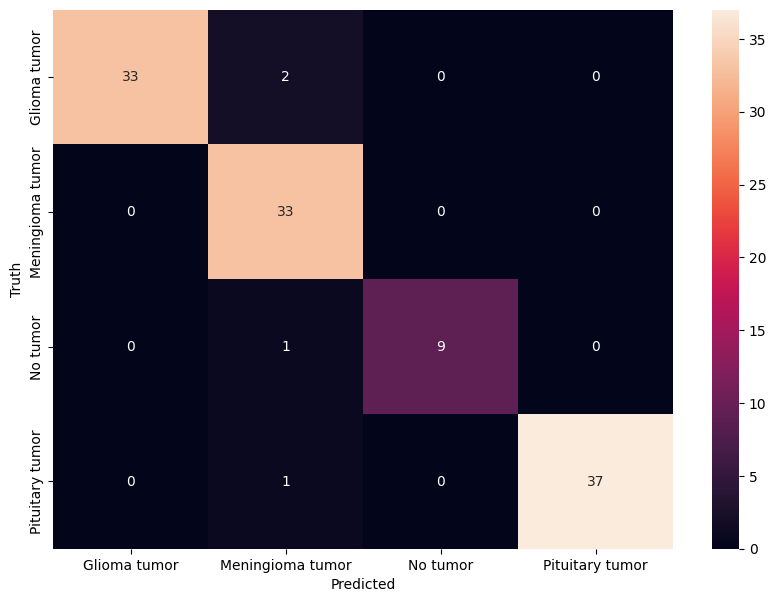

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# confusion matrix on rest_images
predictions = class_4_predictor.predict(rest_images)
predictions = predictions.argmax(axis=1)
rest_true = rest_labels.argmax(axis=1)
# Now we generate the confusion matrix
cm = confusion_matrix(rest_true, predictions)

# Assuming you have already calculated the confusion matrix 'cm'
labels = ["Glioma tumor", "Meningioma tumor", "No tumor", "Pituitary tumor"]

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

